### Problem Statement

The objective of this task is to:

1) Build lexicon based spam filter on Twitter data set using AFINN

2) Build a spam filterusing Naïve Bayes on Text Blob

3) Compare the classification accuracies of two approaches (AFINN/Lexicon, Naïve Bayes)

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk

In [2]:
%matplotlib inline

In [3]:
data  = pd.read_csv(r'C:\Users\MRAVI\Desktop\Text Analytics\Assignment 3\train_tweets.csv')

In [4]:
data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


The data has 3 columns id, label, and tweet. label is the binary target variable and tweet contains the tweets that we will clean and preprocess.

Initial data cleaning requirements that we can think of after looking at the top 5 records:

1) The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.

2) We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.

3) Most of the smaller words do not add much value. For example, ‘all’. So, we will try to remove them as well from our data.

4) Once we have executed the above three steps, we can split every tweet into individual tokens. 

5) In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information.

#### 1) Removing @user

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [6]:
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

# np.vectorize takes a nested sequence of objects or numpy arrays as inputs and returns a 
#single numpy array or a tuple of numpy arrays.
# src: https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html

# Here we are using regular expression "@[\w]* to find the pattern of words beginning with @

In [7]:
data['clean_tweet'].head()

0      when a father is dysfunctional and is so sel...
1      thanks for #lyft credit i can't use cause th...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: clean_tweet, dtype: object

#### 2) Removing Punctuations, Numbers, and Special Characters

In [8]:
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

#Here we will replace everything except characters and hashtags with spaces.

#### 3) Removing Short Words

In [9]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Here we remove all the words having length 3 or less. The reason for removing the short words are, there are multiple words with "oh" and "hmm" in the given document
# these words are very less useful for further analysis.

In [10]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


#### 4) Normalization

In [11]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['clean_tweet'].head()

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cause they offer wheelchai...
2                                  bihday your majesty
3                           #model love take with time
4                       factsguide society #motivation
Name: clean_tweet, dtype: object

#### 5) Sopword Removal

They are common words that do not contribute much to the content or meaning of a document. Stopwords add noise to bag-of-words comparisons, so they are usually excluded.

Stopwords are common language words such as articles (a, an, the, etc.) and other tokens that may have less value for searching.

In [12]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [13]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
data['clean_tweet'].head()                                       

0    father dysfunctional selfish drags kids dysfun...
1    thanks #lyft credit cause offer wheelchair van...
2                                       bihday majesty
3                                #model love take time
4                       factsguide society #motivation
Name: clean_tweet, dtype: object

#### 4) Tokenization

Tokenization is the process of breaking up the given text into smaller units called tokens. The tokens may be words or number or punctuation mark. Tokenization does this task by locating word boundaries. Ending point of a word and beginning of the next word is called word boundaries.

In [14]:
import nltk
from nltk.tokenize import word_tokenize

In [15]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

#### 6) Stemming

Stemming work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that this approach presents some limitations.

In [16]:
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()
#stemmed_words = tokenized_tweet.apply(lambda x: " ".join([ps.stem(word) for word in x]))
#stemmed_words.head()

In [17]:
#In the above output, dysfunctional has been transformed into dysfunct, among other changes.

#### 7) Lematization

Lemmatization, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

Important difference between Stemming and Lematization is that a lemma is the base form of all its inflectional forms, whereas a stem isn’t. This is why regular dictionaries are lists of lemmas, not stems.

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [18]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
lemma_words = tokenized_tweet.apply(lambda x: " ".join([wnl.lemmatize(word) for word in x]))
lemma_words.head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks #lyft credit cause offer wheelchair van...
2                                       bihday majesty
3                                #model love take time
4                       factsguide society #motivation
Name: clean_tweet, dtype: object

In [19]:
#Now let’s stitch these tokens back together.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['clean_tweet'] = tokenized_tweet

#### 8) WordCloud

To understand the common words used in the tweets

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

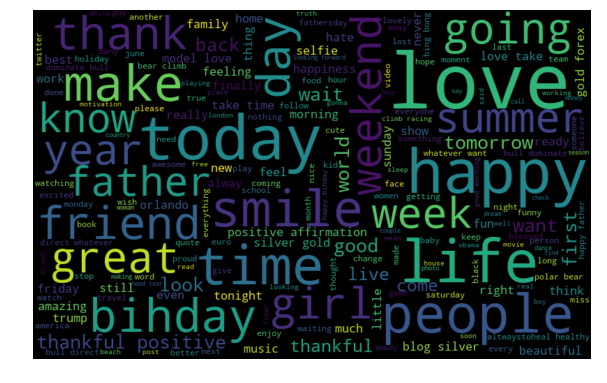

In [20]:
all_words = ' '.join([text for text in data['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. With happy and love being the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes(racist/sexist or not).

#### a) Words in ham tweets

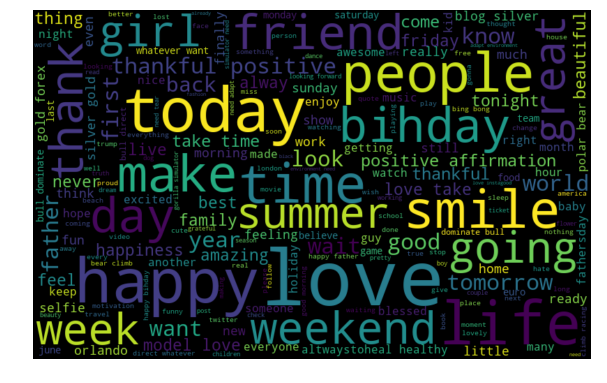

In [21]:
normal_words =' '.join([text for text in data['clean_tweet'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

#### b) Words in Spam Tweets

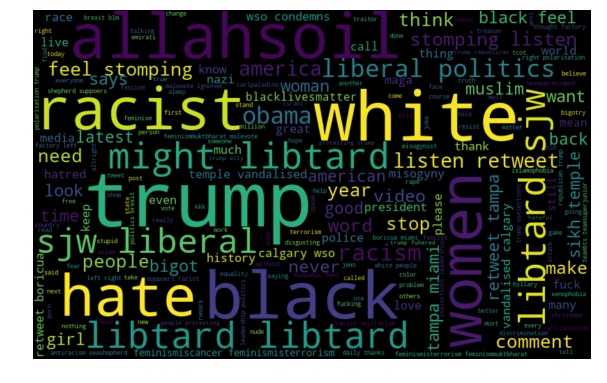

In [22]:
negative_words = ' '.join([text for text in data['clean_tweet'][data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

#### 9) Understanding the impact of Hashtags on tweets

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [23]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['clean_tweet'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['clean_tweet'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

##### Non-Racist/Sexist (Ham) Tweets

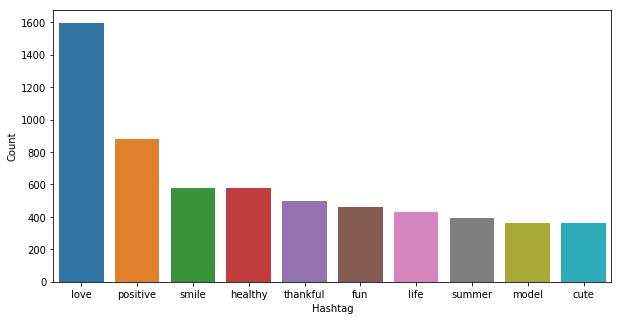

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

##### Racist/Sexist (Spam) Tweets

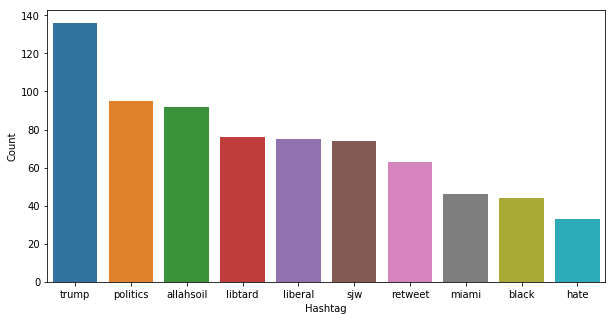

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(10,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

#### Splitting Train and Test Datasets

In [27]:
x = data['clean_tweet']
y = data['label']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x[0:5000], y[0:5000], test_size=0.2)

#### Vectorization

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

x_train_vect = vect.fit_transform(x_train)

### Spam Filtering

#### Multinomial Naive Bayes Classifier

In [59]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

#Fitting the Multinomial Naive Bayes model
nb.fit(x_train_vect, y_train)

nb.score(x_train_vect, y_train)

0.9565

In [60]:
x_test_vect = vect.transform(x_test)

y_pred = nb.predict(x_test_vect)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [61]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 94.70%

F1 Score: 43.01

COnfusion Matrix:
 [[927  15]
 [ 38  20]]


Text(0.5,0,'Predicted')

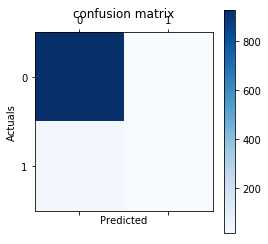

In [78]:
plt.matshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('Actuals')
plt.xlabel('Predicted')

For a breakdown of the confusion matrix, we have:

927 predicted positive (0), and was positive (0). True Positive.
20 predicted negative (1), and was negative (1). True Negative.
38 predicted positive (0), but was negative (1). False Positive.
15 predicted negative (1), but was positive (0). False Negative.

From the above results, it is very clear that Multinomial Naive Bayes classifier performed great with 94.70% accuracy. The classifier was able to predict 947 (=927+20) tweets correctly out of 1000 tweets.

#### Using Naive Bayes Classifier Available in TextBlob

In [43]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

train = list(zip(x_train, y_train))
test = list(zip(x_test, y_test))
#test_tweet, test_labels = map(list, zip(*test))


In [44]:
cl = NaiveBayesClassifier(train)

In [45]:
print(cl.accuracy(test))
cl.show_informative_features(5)

0.949
Most Informative Features
        contains(racism) = True                1 : 0      =     91.6 : 1.0
       contains(liberal) = True                1 : 0      =     60.2 : 1.0
        contains(racist) = True                1 : 0      =     50.5 : 1.0
         contains(bigot) = True                1 : 0      =     48.0 : 1.0
      contains(equality) = True                1 : 0      =     39.3 : 1.0


#### with AFINN Lexicon

In [79]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(tweet) for tweet in x_test]
sentiment_category = ['1' if score > 0 
                          else '0'
                              for score in sentiment_scores]

In [80]:
#test_tweet, test_labels = map(list, zip(*test))
df2 = pd.DataFrame([list(x_test), list(y_test), sentiment_scores, sentiment_category]).T
df2.columns = ['tweet', 'label','sentiment_score', 'sentiment_category']
df2['sentiment_score'] = df2.sentiment_score.astype('float')

In [81]:
type(x_test)

pandas.core.series.Series

In [82]:
#df2[['label', 'sentiment_category']] = df[['label', 'sentiment_category']].apply(pd.to_numeric)
#df2['label'] = pd.to_numeric(df["label"])
y_test = df2['label']
y_pred = df2['sentiment_category']
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

In [83]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 46.60%


In [84]:
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))


F1 Score: 2.55

COnfusion Matrix:
 [[459 483]
 [ 51   7]]


Text(0.5,0,'Predicted')

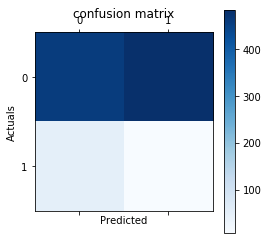

In [85]:
plt.matshow(confusion_matrix(y_test, y_pred), cmap="Blues", interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('Actuals')
plt.xlabel('Predicted')

We can see that our model has predicted the sentiment with a 46.60% accuracy. Also, looking at the confusion matrix we can see  that it's not doing that great of a job classifying.

For a breakdown of the confusion matrix, we have:

459 predicted positive (0), and was positive (0). True Positive.
7 predicted negative (1), and was negative (1). True Negative.
51 predicted positive (0), but was negative (1). False Positive.
483 predicted negative (1), but was positive (0). False Negative.

The classifier was able to predict 466 (=459+7) tweets correctly out of 1000 tweets. and 534 (=51+483) tweets classified incorrectly.

##### From the results from Multinomial NB classifer and Afinn based classifier, MNB classifier outperformed Afinn based classifier